In [1]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save
import matplotlib.pyplot as plt
from IPython.display import IFrame
from hashlib import sha1
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
game_stat = pd.read_csv('data/game_statistics.csv')
game_stat.head()

,Game_ID,Season,Team,Date,Is_home,Player_Id,Name,Pos.,Age,Game_No.,...,SH_xGF,SH_xGA,SH_SF,SH_SA,SH_FF,SH_FA,SH_CF,SH_CA,PEN_take,PEN_draw
0,2007020001,20072008,ANA,29/9/2007,0,8457261,Brad May,F,35.8,1,...,0.0,0.000000,0,0,0,0,0,0,0,2
1,2007020001,20072008,ANA,29/9/2007,0,8458637,Sean O'Donnell,D,36.0,1,...,0.0,0.000000,0,0,0,0,0,0,0,0
2,2007020001,20072008,ANA,29/9/2007,0,8459424,Chris Pronger,D,33.0,1,...,0.0,0.197766,0,2,0,2,0,2,2,0
3,2007020001,20072008,ANA,29/9/2007,0,8459427,Rob Niedermayer,F,32.8,1,...,0.0,0.000000,0,0,0,0,0,0,4,2
4,2007020001,20072008,ANA,29/9/2007,0,8459444,Todd Bertuzzi,F,32.7,1,...,0.0,0.000000,0,0,0,0,0,0,2,4


In [3]:
game_stat = game_stat[game_stat['Season'] == 20212022]
game_stat.head()

,Game_ID,Season,Team,Date,Is_home,Player_Id,Name,Pos.,Age,Game_No.,...,SH_xGF,SH_xGA,SH_SF,SH_SA,SH_FF,SH_FA,SH_CF,SH_CA,PEN_take,PEN_draw
669171,2021020001,20212022,PIT,12/10/2021,0,8470604,Jeff Carter,F,36.8,1,...,0.0,0.0,0,0,0,0,0,1,0,0
669172,2021020001,20212022,PIT,12/10/2021,0,8470619,Brian Boyle,F,36.8,1,...,0.0,0.0,0,0,0,0,0,0,0,0
669173,2021020001,20212022,PIT,12/10/2021,0,8471724,Kris Letang,D,34.5,1,...,0.0,0.0,0,0,0,0,0,1,0,0
669174,2021020001,20212022,PIT,12/10/2021,0,8475208,Brian Dumoulin,D,30.1,1,...,0.0,0.0,0,0,0,0,0,0,0,0
669175,2021020001,20212022,PIT,12/10/2021,0,8475722,Jason Zucker,F,29.7,1,...,0.0,0.0,0,0,0,0,0,1,0,0


In [4]:
game_stat = game_stat.drop(columns = ['Game_ID','Season','Team','Date','Name','Player_Id','Game_No.'])
game_stat.head()

,Is_home,Pos.,Age,TOI_All,TOI_EV,TOI_PP,TOI_SH,EV_G,EV_A1,EV_A2,...,SH_xGF,SH_xGA,SH_SF,SH_SA,SH_FF,SH_FA,SH_CF,SH_CA,PEN_take,PEN_draw
669171,0,F,36.8,939,921,18,0,0,1,0,...,0.0,0.0,0,0,0,0,0,1,0,0
669172,0,F,36.8,506,440,0,66,1,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
669173,0,D,34.5,1317,1258,30,29,0,1,0,...,0.0,0.0,0,0,0,0,0,1,0,0
669174,0,D,30.1,1173,1082,0,91,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
669175,0,F,29.7,990,969,21,0,0,0,0,...,0.0,0.0,0,0,0,0,0,1,0,0


In [5]:
game_stat.columns

Index(['Is_home', 'Pos.', 'Age', 'TOI_All', 'TOI_EV', 'TOI_PP', 'TOI_SH',
       'EV_G', 'EV_A1', 'EV_A2', 'EV_ixG', 'EV_GF', 'EV_GA', 'EV_xGF',
       'EV_xGA', 'EV_SF', 'EV_SA', 'EV_FF', 'EV_FA', 'EV_CF', 'EV_CA', 'PP_G',
       'PP_A1', 'PP_A2', 'PP_ixG', 'PP_GF', 'PP_GA', 'PP_xGF', 'PP_xGA',
       'PP_SF', 'PP_SA', 'PP_FF', 'PP_FA', 'PP_CF', 'PP_CA', 'SH_G', 'SH_A1',
       'SH_A2', 'SH_ixG', 'SH_GF', 'SH_GA', 'SH_xGF', 'SH_xGA', 'SH_SF',
       'SH_SA', 'SH_FF', 'SH_FA', 'SH_CF', 'SH_CA', 'PEN_take', 'PEN_draw'],
      dtype='object')

In [6]:
X = game_stat.drop(columns = ['Pos.'])
y = game_stat['Pos.']

In [10]:
train_df, test_df = train_test_split(game_stat, test_size = 0.4, random_state = 123)

In [12]:
train_df

,Is_home,Pos.,Age,TOI_All,TOI_EV,TOI_PP,TOI_SH,EV_G,EV_A1,EV_A2,...,SH_xGF,SH_xGA,SH_SF,SH_SA,SH_FF,SH_FA,SH_CF,SH_CA,PEN_take,PEN_draw
717581,1,F,33.1,828,727,101,0,0,0,0,...,0.0,0.015181,0,0,0,1,0,1,0,0
718860,0,D,25.2,1324,1303,21,0,0,0,1,...,0.0,0.113507,0,1,0,1,0,1,0,2
705921,1,F,23.6,701,701,0,0,0,0,0,...,0.0,0.000000,0,0,0,0,0,0,0,0
716142,0,F,29.9,1048,1016,2,30,1,1,0,...,0.0,0.000000,0,0,0,0,0,1,0,0
674971,0,D,28.4,748,748,0,0,0,0,0,...,0.0,0.000000,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684548,0,F,24.9,675,675,0,0,1,0,0,...,0.0,0.000000,0,0,0,0,0,0,7,7
686901,0,F,26.4,884,815,60,9,0,0,0,...,0.0,0.000000,0,0,0,0,0,0,0,0
697201,0,D,25.7,1138,950,74,114,0,0,0,...,0.0,0.000000,0,0,0,0,0,0,0,0
684896,1,F,20.6,1093,856,237,0,0,0,0,...,0.0,0.000000,0,0,0,0,0,0,0,2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [18]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [20]:
results_dict = {}

In [19]:
pipe_dummy = make_pipeline(
    StandardScaler(), DummyClassifier(strategy="most_frequent")
)

In [21]:
results_dict["DummyClassifier"] = mean_std_cross_val_scores(
    pipe_dummy, X_train, y_train, return_train_score=True
)

In [22]:
pipe_tree = make_pipeline(
    StandardScaler(), DecisionTreeClassifier()
)

In [23]:
results_dict["DecisionTreeClassifier"] = mean_std_cross_val_scores(
    pipe_tree, X_train, y_train, return_train_score=True
)

In [25]:
pipe_neighbor = make_pipeline(
    StandardScaler(), KNeighborsClassifier(n_neighbors=5)
)

In [26]:
results_dict["KNeighborsClassifier"] = mean_std_cross_val_scores(
    pipe_neighbor, X_train, y_train, return_train_score=True
)

In [28]:
pipe_svc = make_pipeline(
    StandardScaler(), SVC(random_state = 123)
)


In [29]:
results_dict["SVC"] = mean_std_cross_val_scores(
    pipe_svc, X_train, y_train, return_train_score=True
)

In [30]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
DummyClassifier,0.019 (+/- 0.003),0.004 (+/- 0.001),0.626 (+/- 0.000),0.626 (+/- 0.000)
DecisionTreeClassifier,0.348 (+/- 0.017),0.006 (+/- 0.001),0.812 (+/- 0.004),1.000 (+/- 0.000)
KNeighborsClassifier,0.024 (+/- 0.001),0.211 (+/- 0.010),0.800 (+/- 0.004),0.861 (+/- 0.001)
SVC,11.199 (+/- 0.080),5.513 (+/- 0.261),0.865 (+/- 0.003),0.882 (+/- 0.001)


In [31]:
depths = np.arange(1, 25, 2)

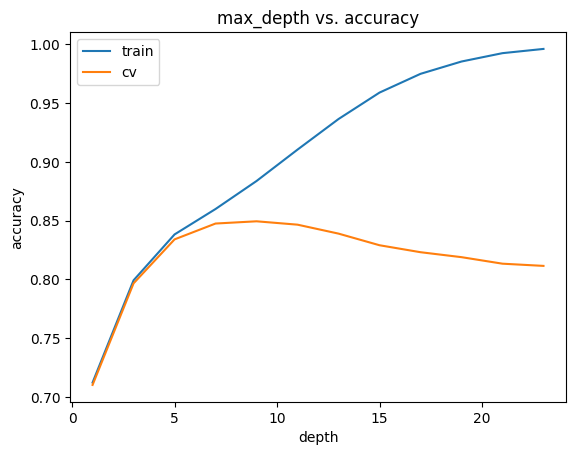

In [33]:
results = {
    "depth" : [],
    "mean_train" : [],
    "mean_cross": [],
}

for depth in depths: #10 folde cv
    model = DecisionTreeClassifier(max_depth=depth,random_state = 123)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results["depth"].append(depth)
    results["mean_train"].append(scores["train_score"].mean())
    results["mean_cross"].append(scores["test_score"].mean())

results_df = pd.DataFrame(results) 
results_df = results_df.set_index("depth")
results_df = results_df.rename(columns={"mean_train": "train", "mean_cross": "cv"})
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = results_df[["train", "cv"]].plot(title="max_depth vs. accuracy", ylabel="accuracy")

In [35]:
results_df

,train,cv
depth,,
1,0.712377,0.710371
3,0.799294,0.796720
5,0.838302,0.834097
7,0.859919,0.847564
9,0.883714,0.849465
11,0.910412,0.846597
13,0.936404,0.838991
15,0.958879,0.829109
17,0.974819,0.823186


In [34]:
best_max_depth = results_df.cv.idxmax()
best_max_depth

9

In [36]:
pipe_tree = make_pipeline(
    StandardScaler(), DecisionTreeClassifier(max_depth=best_max_depth,random_state = 123)
)


In [37]:
results_dict["DecisionTreeClassifier_optimized"] = mean_std_cross_val_scores(
    pipe_tree, X_train, y_train, return_train_score=True
) #five fold cv

In [38]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
DummyClassifier,0.019 (+/- 0.003),0.004 (+/- 0.001),0.626 (+/- 0.000),0.626 (+/- 0.000)
DecisionTreeClassifier,0.220 (+/- 0.004),0.006 (+/- 0.001),0.849 (+/- 0.003),0.885 (+/- 0.002)
KNeighborsClassifier,0.024 (+/- 0.001),0.211 (+/- 0.010),0.800 (+/- 0.004),0.861 (+/- 0.001)
SVC,11.199 (+/- 0.080),5.513 (+/- 0.261),0.865 (+/- 0.003),0.882 (+/- 0.001)


In [ ]:
param_grid = {"svc__C": 10.0 ** np.arange(-2, 3),"svc__gamma": 10.0 ** np.arange(-2, 3)}

grid = GridSearchCV(pipe_svc,param_grid,n_jobs = -1, return_train_score = True)

grid_results = pd.DataFrame.from_dict(grid.cv_results_)

In [ ]:
grid_results.plot(x = 'log_param_svc__C',y=['mean_test_score','mean_train_score'])

In [ ]:
best_C = grid.best_params_['svc__C']
best_C_score = grid_results[grid_results['param_svc__C'] ==best_C ]['mean_test_score'].iloc[0]

In [39]:
#RandomizedSearchCV